In [72]:
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from keras_tuner import Hyperband, Objective
from imblearn.over_sampling import SMOTE
import os
import shutil
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Kamal,Sanaa, ElEleimy,Mohamed, Hegazy,Doaa, and Nasr,Mahmoud. (2019). Hepatitis C Virus (HCV) for Egyptian patients. UCI Machine Learning Repository. https://doi.org/10.24432/C5989V.

In [ ]:
import pandas as pd
df=pd.read_csv("HCV-Egy-Data.csv")
df.head()


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [74]:
df.rename(columns = str.lower ,inplace = True)

In [75]:
df.rename(columns=str.strip,inplace=True)

In [76]:
df.columns = ['age', 'gender', 'bmi', 'fever', 'nausea/vomting', 'headache',
       'diarrhea', 'fatigue & generalized bone ache', 'jaundice',
       'epigastric pain', 'wbc', 'rbc', 'hgb', 'plat', 'ast 1', 'alt 1',
       'alt4', 'alt 12', 'alt 24', 'alt 36', 'alt 48', 'alt after 24 w',
       'rna base', 'rna 4', 'rna 12', 'rna eot', 'rna ef',
       'baseline histological grading', 'staging']

In [77]:
import plotly.express as px

# Histogram of Age
fig = px.histogram(df, x='age', nbins=20, title='Age Distribution')
fig.show()


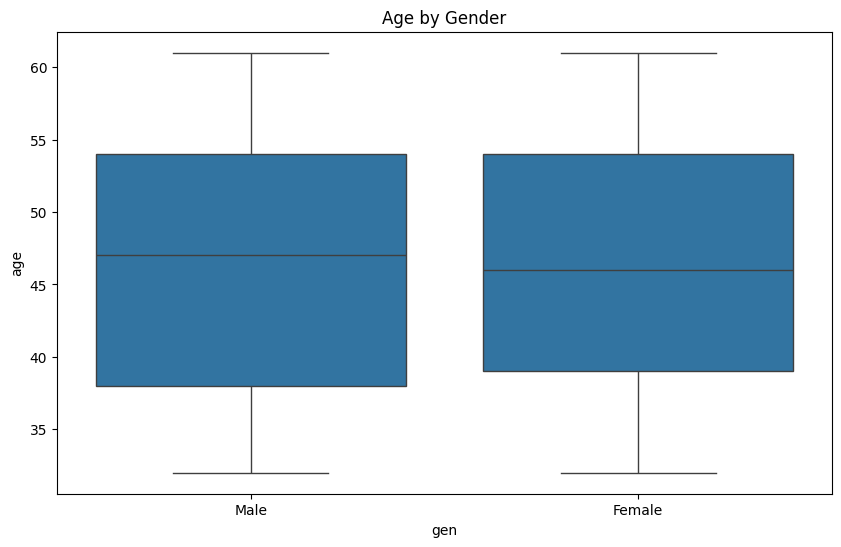

In [78]:
import seaborn as sns 
import matplotlib.pyplot as plt
df['gen'] = df['gender'].map({1: 'Male', 2: 'Female'})

# Boxplot of BMI by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gen', y='age', data=df)
plt.title('Age by Gender')
plt.show()

In [79]:
import plotly.express as px
fig = px.scatter(df, x='age', y='bmi', color='gender', 
                 title='Age vs. BMI by Gender',
                 labels={'Gender': 'Gender'},
                 color_discrete_map={'Male': 'blue', 'Female': 'pink'})
fig.show()


In [80]:
fig = px.box(df, x='gender', y='alt 36', 
             title='ALT 36 by Gender',
             labels={'Gender': 'Gender', 'ALT 36': 'ALT 36 Levels'})
fig.show()

In [81]:
import plotly.graph_objects as go

fig = go.Figure()

for column in ['rna base', 'rna 4', 'rna eot', 'rna ef']:
    fig.add_trace(go.Scatter(
        x=df.index, y=df[column],
        mode='lines',
        name=column
    ))

fig.update_layout(
    title='RNA Levels Over samples',
    xaxis_title='Index',
    yaxis_title='RNA Levels'
)

fig.show()

In [82]:
fig = px.pie(df, names='staging', 
             title='Baseline Histological Staging Distribution')
fig.show()

In [83]:
fig = px.violin(df, x='staging', y='age', 
                box=True, points='all',
                title='age by Baseline Histological Staging',
                labels={'Baselinehistological staging': 'Histological Staging', 'ALT 36': 'ALT 36 Levels'})
fig.show()

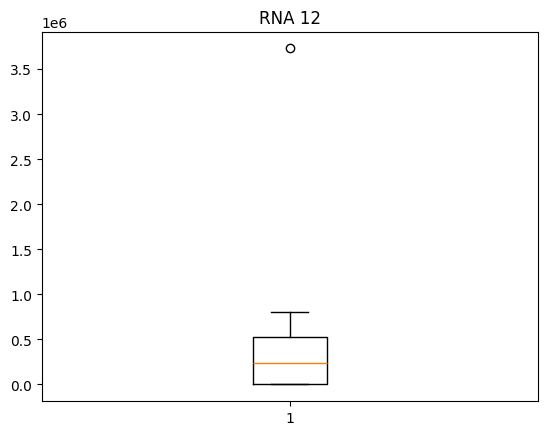

In [84]:
plt.boxplot(df['rna 12'])
plt.title('RNA 12')
plt.show()

In [85]:
df

,age,gender,bmi,fever,nausea/vomting,headache,diarrhea,fatigue & generalized bone ache,jaundice,epigastric pain,...,alt 48,alt after 24 w,rna base,rna 4,rna 12,rna eot,rna ef,baseline histological grading,staging,gen
0,56,1,35,2,1,1,1,2,2,2,...,5,5,655330,634536,288194,5,5,13,2,Male
1,46,1,29,1,2,2,1,2,2,1,...,123,44,40620,538635,637056,336804,31085,4,2,Male
2,57,1,33,2,2,2,2,1,1,1,...,5,5,571148,661346,5,735945,558829,4,4,Male
3,49,2,33,1,2,1,2,1,2,1,...,77,33,1041941,449939,585688,744463,582301,10,3,Female
4,59,1,32,1,1,2,1,2,2,2,...,90,30,660410,738756,3731527,338946,242861,11,1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,44,45,387795,55938,5,5,5,15,4,Male
1381,55,1,34,1,2,2,1,1,1,1,...,64,41,481378,152961,393339,73574,236273,10,2,Male
1382,42,1,26,2,2,1,1,1,2,1,...,39,24,612664,572756,806109,343719,160457,6,2,Male
1383,52,1,29,2,1,1,2,2,2,1,...,81,43,139872,76161,515730,2460,696074,15,3,Male


In [86]:
indexes_to_drop = [0, 2, 457 , 4]
df = df.drop(index=indexes_to_drop) # حذف کردن داده های پرت در داده
df = df.reset_index()
df

,index,age,gender,bmi,fever,nausea/vomting,headache,diarrhea,fatigue & generalized bone ache,jaundice,...,alt 48,alt after 24 w,rna base,rna 4,rna 12,rna eot,rna ef,baseline histological grading,staging,gen
0,1,46,1,29,1,2,2,1,2,2,...,123,44,40620,538635,637056,336804,31085,4,2,Male
1,3,49,2,33,1,2,1,2,1,2,...,77,33,1041941,449939,585688,744463,582301,10,3,Female
2,5,58,2,22,2,2,2,1,2,2,...,114,29,1157452,1086852,5,5,5,4,4,Female
3,6,42,2,26,1,1,2,2,2,2,...,80,28,325694,1034008,275095,214566,635157,12,4,Female
4,7,48,2,30,1,1,2,2,1,1,...,53,39,641129,72050,787295,370605,506296,12,3,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,1380,44,1,29,1,2,2,2,1,1,...,44,45,387795,55938,5,5,5,15,4,Male
1377,1381,55,1,34,1,2,2,1,1,1,...,64,41,481378,152961,393339,73574,236273,10,2,Male
1378,1382,42,1,26,2,2,1,1,1,2,...,39,24,612664,572756,806109,343719,160457,6,2,Male
1379,1383,52,1,29,2,1,1,2,2,2,...,81,43,139872,76161,515730,2460,696074,15,3,Male


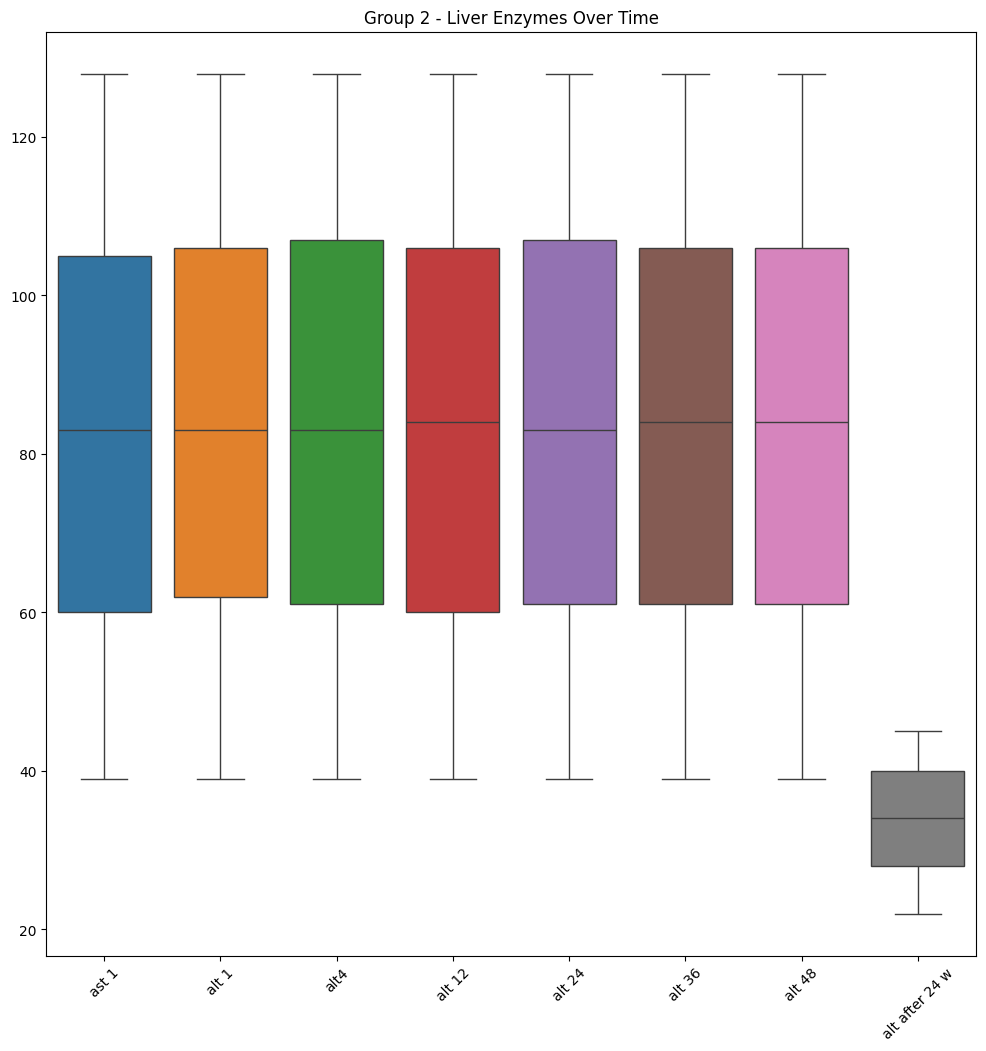

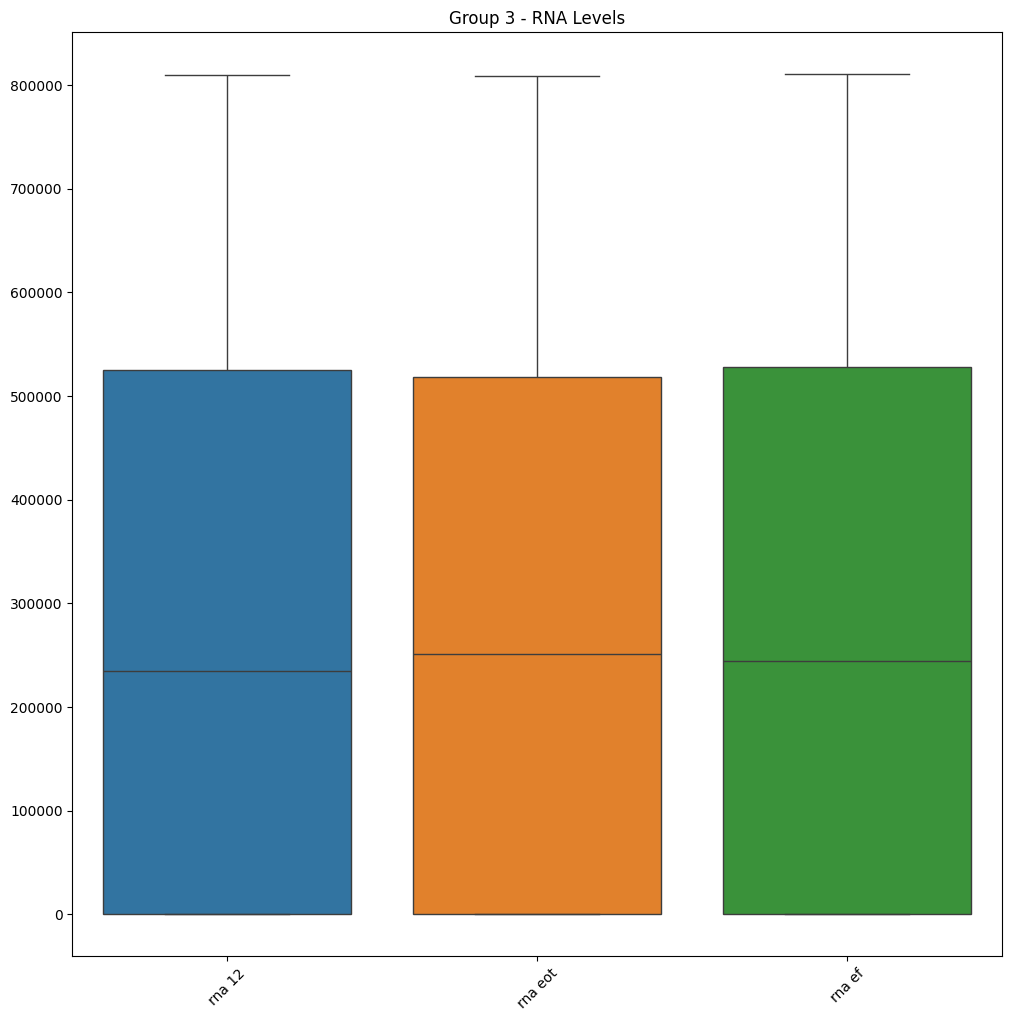

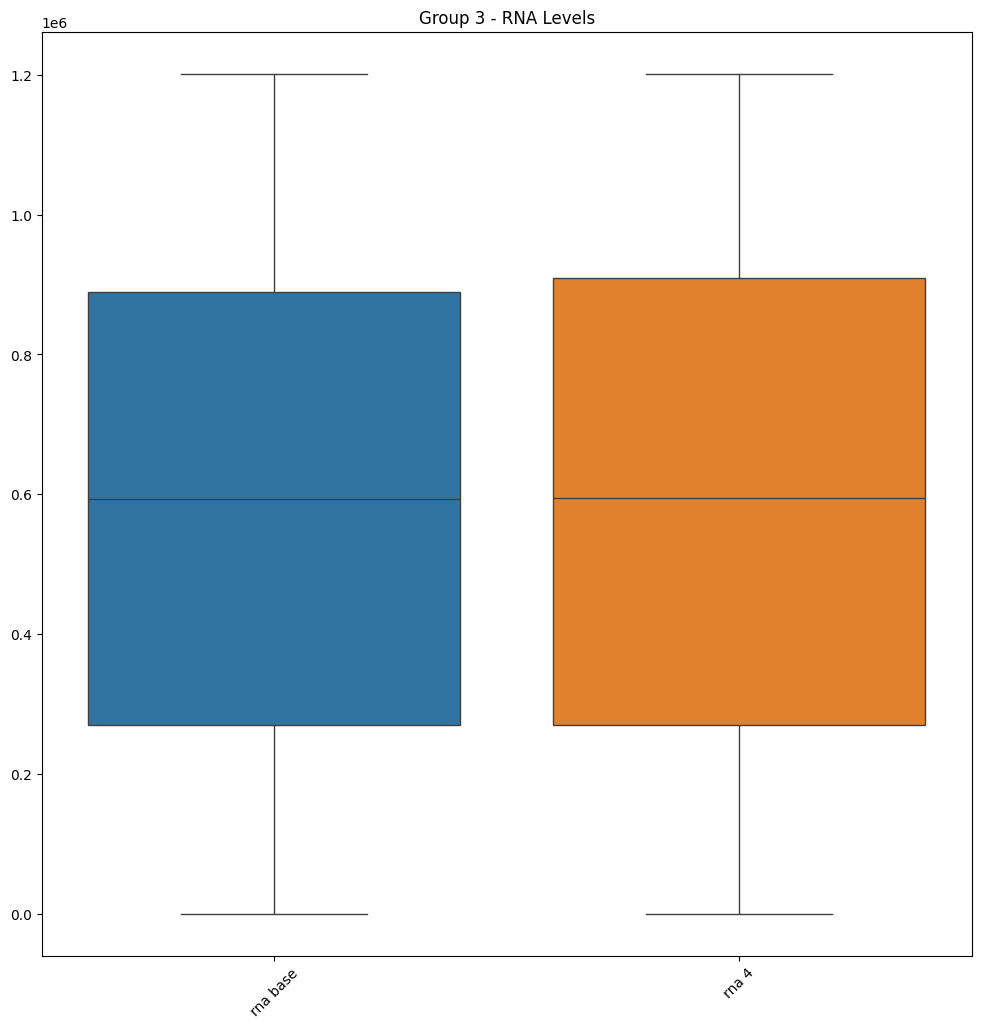

In [87]:
group_1 = ['ast 1', 'alt 1', 'alt4', 'alt 12', 'alt 24', 'alt 36', 'alt 48', 'alt after 24 w']
group_2 = ['rna 12', 'rna eot', 'rna ef']
group_3 = ['rna base', 'rna 4']

plt.figure(figsize=(12, 12))

sns.boxplot(data=df[group_1])
plt.title('Group 2 - Liver Enzymes Over Time')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 12))
sns.boxplot(data=df[group_2])
plt.title('Group 3 - RNA Levels')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 12))
sns.boxplot(data=df[group_3])
plt.title('Group 3 - RNA Levels')
plt.xticks(rotation=45)
plt.show()

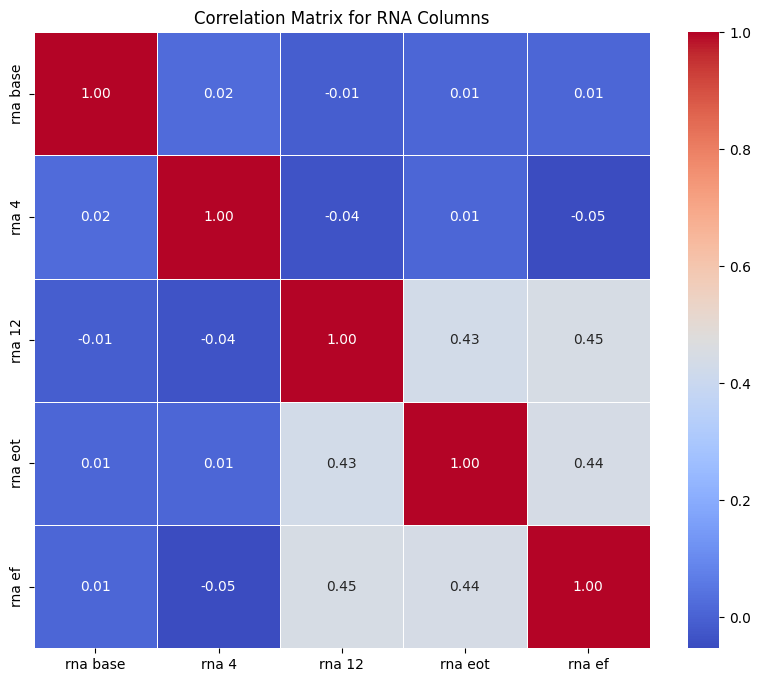

In [88]:
rna_columns = ['rna base', 'rna 4', 'rna 12', 'rna eot', 'rna ef']
corr_matrix = df[rna_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5,
            xticklabels=rna_columns, yticklabels=rna_columns)
plt.title('Correlation Matrix for RNA Columns')
plt.show()

In [89]:
df.isnull().sum()

index                              0
age                                0
gender                             0
bmi                                0
fever                              0
nausea/vomting                     0
headache                           0
diarrhea                           0
fatigue & generalized bone ache    0
jaundice                           0
epigastric pain                    0
wbc                                0
rbc                                0
hgb                                0
plat                               0
ast 1                              0
alt 1                              0
alt4                               0
alt 12                             0
alt 24                             0
alt 36                             0
alt 48                             0
alt after 24 w                     0
rna base                           0
rna 4                              0
rna 12                             0
rna eot                            0
r

In [90]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

age_bins = [20, 30, 40, 50, 60 ,70, 80]
age_labels = [ '0-20', '21-30', '31-40', '41-50','51-60','60+']


df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels , right=False)
df['AgeGroupEncoded'] = df['AgeGroup'].cat.codes

onehot_encoder = OneHotEncoder(sparse_output=False)
age_group_encoded = onehot_encoder.fit_transform(df[['AgeGroup']])


age_group_encoded_df =  pd.DataFrame(age_group_encoded, columns=onehot_encoder.get_feature_names_out(['AgeGroup']))
age_col_idx = df.columns.get_loc('age')


for col in age_group_encoded_df.columns[::-1]:
    df.insert(age_col_idx + 1, col, age_group_encoded_df[col])

df

,index,age,AgeGroup_21-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,gender,bmi,fever,nausea/vomting,...,rna base,rna 4,rna 12,rna eot,rna ef,baseline histological grading,staging,gen,AgeGroup,AgeGroupEncoded
0,1,46,0.0,1.0,0.0,0.0,1,29,1,2,...,40620,538635,637056,336804,31085,4,2,Male,31-40,2
1,3,49,0.0,1.0,0.0,0.0,2,33,1,2,...,1041941,449939,585688,744463,582301,10,3,Female,31-40,2
2,5,58,0.0,0.0,1.0,0.0,2,22,2,2,...,1157452,1086852,5,5,5,4,4,Female,41-50,3
3,6,42,0.0,1.0,0.0,0.0,2,26,1,1,...,325694,1034008,275095,214566,635157,12,4,Female,31-40,2
4,7,48,0.0,1.0,0.0,0.0,2,30,1,1,...,641129,72050,787295,370605,506296,12,3,Female,31-40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,1380,44,0.0,1.0,0.0,0.0,1,29,1,2,...,387795,55938,5,5,5,15,4,Male,31-40,2
1377,1381,55,0.0,0.0,1.0,0.0,1,34,1,2,...,481378,152961,393339,73574,236273,10,2,Male,41-50,3
1378,1382,42,0.0,1.0,0.0,0.0,1,26,2,2,...,612664,572756,806109,343719,160457,6,2,Male,31-40,2
1379,1383,52,0.0,0.0,1.0,0.0,1,29,2,1,...,139872,76161,515730,2460,696074,15,3,Male,41-50,3


In [91]:
def clean_data(df):

    df = df.drop(columns=['age'])

    df = df.drop(columns=['AgeGroup_21-30'])

    df = df.drop(columns=['AgeGroup_31-40'])

    df = df.drop(columns=['AgeGroup_41-50'])

    df = df.drop(columns=['AgeGroup_51-60'])
  
    df = df.drop(columns=['AgeGroup'])

    df = df.drop(columns=['rna eot'])
    
    df = df.drop(columns=['rna ef'])

    df = df.drop(columns=['baseline histological grading'])
    
    df = df.drop(columns=['alt after 24 w'])

    df = df.drop(columns=['alt 48'])

    df = df.drop(columns=['gen'])
    
        return df

df1 = clean_data(df.copy())
df1.head()

,index,gender,bmi,fever,nausea/vomting,headache,diarrhea,fatigue & generalized bone ache,jaundice,epigastric pain,...,alt 1,alt4,alt 12,alt 24,alt 36,rna base,rna 4,rna 12,staging,AgeGroupEncoded
0,1,1,29,1,2,2,1,2,2,1,...,123,95.0,75,113,57,40620,538635,637056,2,2
1,3,2,33,1,2,1,2,1,2,1,...,64,109.0,80,88,48,1041941,449939,585688,3,2
2,5,2,22,2,2,2,1,2,2,1,...,104,121.0,96,65,73,1157452,1086852,5,4,3
3,6,2,26,1,1,2,2,2,2,2,...,57,113.0,118,107,84,325694,1034008,275095,4,2
4,7,2,30,1,1,2,2,1,1,2,...,112,80.0,127,45,96,641129,72050,787295,3,2


In [92]:
fig = px.pie(df, names='staging', 
             title='Baseline Histological Staging Distribution')
fig.show()

می بینیم که تارگت ما به صورت خوبی متوزان است . اما اینکه دارای 4 کلاس است 

دقت مدل را پایین می آورد. پس لازم است که آنها به دو دسته کلی تقسیم کنیم

In [93]:
df1= df1.replace({"staging":2} , 2).replace({"staging":3} , 2).replace({"staging":4} , 2)

,index,gender,bmi,fever,nausea/vomting,headache,diarrhea,fatigue & generalized bone ache,jaundice,epigastric pain,...,alt 1,alt4,alt 12,alt 24,alt 36,rna base,rna 4,rna 12,staging,AgeGroupEncoded
0,1,1,29,1,2,2,1,2,2,1,...,123,95.0,75,113,57,40620,538635,637056,2,2
1,3,2,33,1,2,1,2,1,2,1,...,64,109.0,80,88,48,1041941,449939,585688,2,2
2,5,2,22,2,2,2,1,2,2,1,...,104,121.0,96,65,73,1157452,1086852,5,2,3
3,6,2,26,1,1,2,2,2,2,2,...,57,113.0,118,107,84,325694,1034008,275095,2,2
4,7,2,30,1,1,2,2,1,1,2,...,112,80.0,127,45,96,641129,72050,787295,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,1380,1,29,1,2,2,2,1,1,1,...,59,78.0,106,127,63,387795,55938,5,2,2
1377,1381,1,34,1,2,2,1,1,1,1,...,102,65.0,99,108,97,481378,152961,393339,2,3
1378,1382,1,26,2,2,1,1,1,2,1,...,93,123.0,61,116,87,612664,572756,806109,2,2
1379,1383,1,29,2,1,1,2,2,2,1,...,97,104.0,74,47,48,139872,76161,515730,2,3


حال همبستگی بین دیتا را چک میکنیم تا فیلد هایی که همبستگی بالایی دارند به چشم آیند

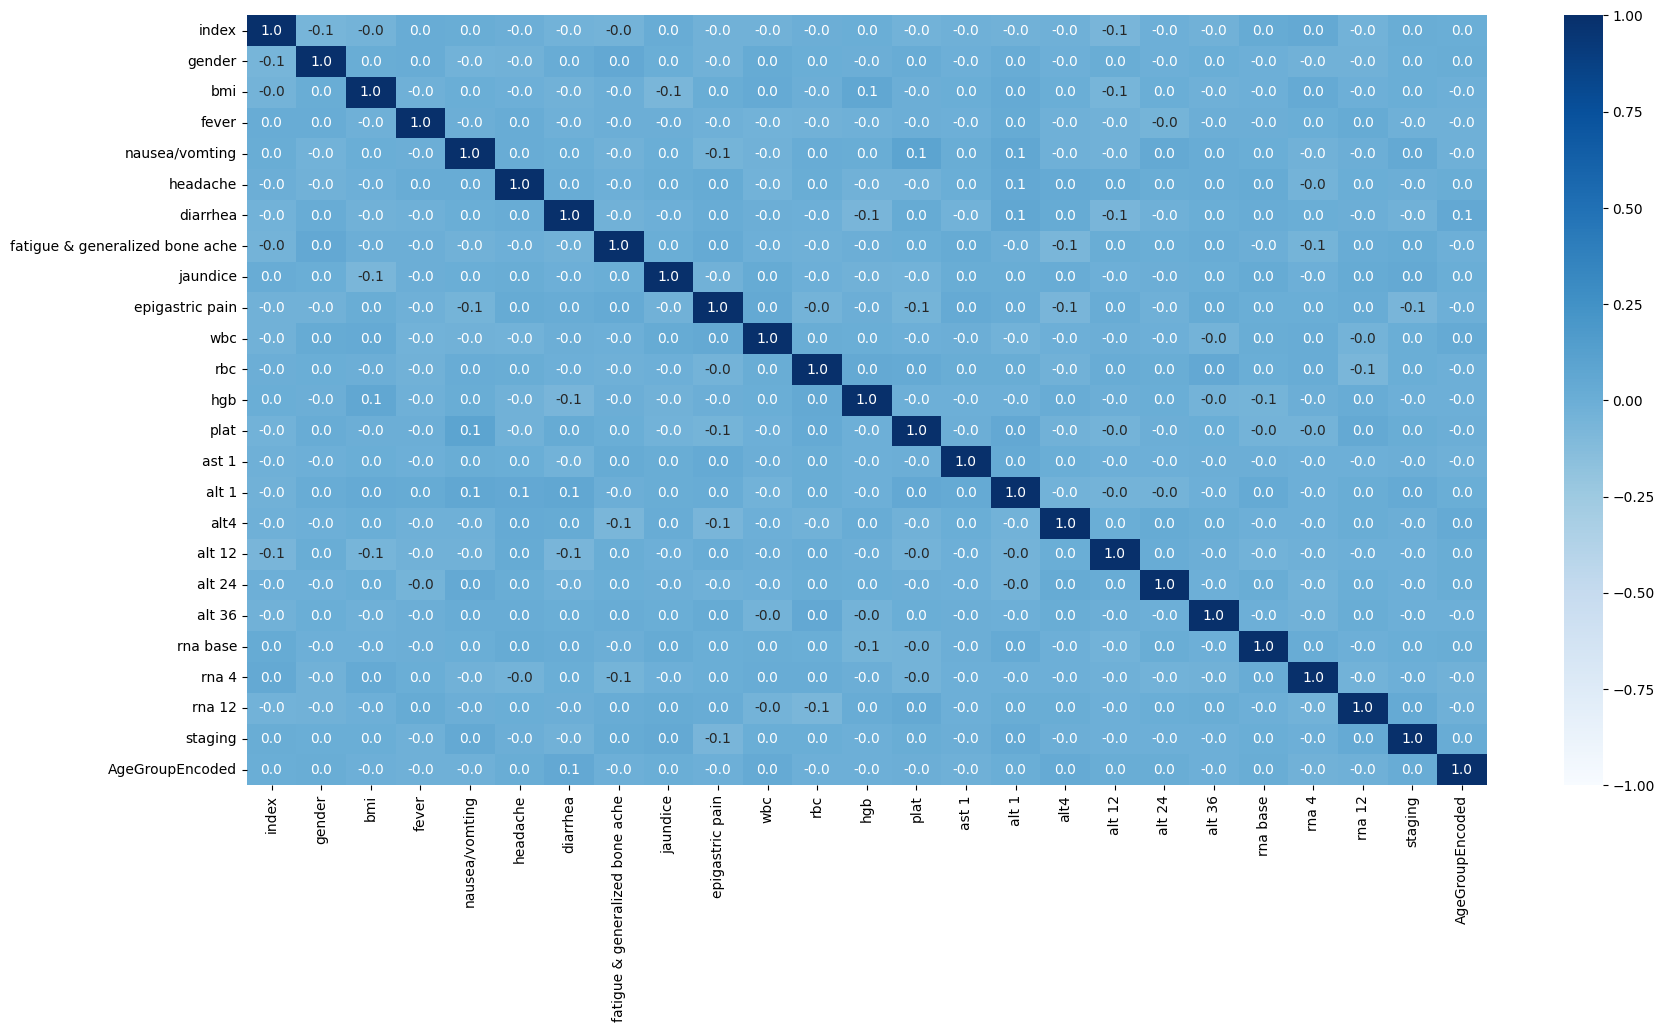

In [94]:
df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), cmap='Blues', vmin='-1' , vmax='+1', annot=True , fmt='0.1f')
plt.show() # همبستگی بین فیچر ها را چک میکنیم

In [95]:
target = 'staging'
features = df1.columns.drop(target)
target

'staging'

# Balancing data

In [96]:
x = df1[features]
y = df1[target] - 1 


print("before SMOTE:", y.value_counts())

smote = SMOTE(random_state=42)

x_resampled, y_resampled = smote.fit_resample(x, y)

print("after SMOTE:", y_resampled.value_counts())



before SMOTE: staging
1    1046
0     335
Name: count, dtype: int64
after SMOTE: staging
1    1046
0    1046
Name: count, dtype: int64


In [97]:
print(f"x_resampled shape: {x_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")


x_resampled shape: (2092, 24)
y_resampled shape: (2092,)


# Normalizing data

In [98]:
scaler = MinMaxScaler()
scaler.fit(x_resampled)
t_df = scaler.transform(x_resampled) 


In [99]:
t_df

array([[0.        , 0.        , 0.53846154, ..., 0.44821962, 0.78646038,
        0.33333333],
       [0.00144613, 1.        , 0.84615385, ..., 0.37441146, 0.7230449 ,
        0.33333333],
       [0.00289226, 1.        , 0.        , ..., 0.90441704, 0.        ,
        0.66666667],
       ...,
       [0.22704266, 0.        , 0.76923077, ..., 0.76306513, 0.16758783,
        0.        ],
       [0.95372379, 0.        , 0.15384615, ..., 0.78442636, 0.04857763,
        0.33333333],
       [0.04989154, 0.        , 0.69230769, ..., 0.19980611, 0.89695972,
        0.        ]])

# Train-test splitting

In [100]:

X_train, X_test, y_train, y_test = train_test_split(t_df, y_resampled, test_size=0.2, random_state=42)


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1673, 24)
X_test shape: (419, 24)
y_train shape: (1673,)
y_test shape: (419,)


# Feature slelection with RandomForest

In [101]:

rfecv = RFECV(estimator=RandomForestClassifier(random_state=42), step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

# Transform the data
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)
print(f"X_train shape: {X_train_selected.shape}")
print(f"X_test shape: {X_test_selected.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1673, 22)
X_test shape: (419, 22)
y_train shape: (1673,)
y_test shape: (419,)


In [102]:
print(f"optimal number of feature: {rfecv.n_features_}")

selected_feature = x.columns[rfecv.support_]
print('Selected feature:', selected_feature)

optimal number of feature: 22
Selected feature: Index(['index', 'gender', 'bmi', 'nausea/vomting', 'headache', 'diarrhea',
       'fatigue & generalized bone ache', 'jaundice', 'wbc', 'rbc', 'hgb',
       'plat', 'ast 1', 'alt 1', 'alt4', 'alt 12', 'alt 24', 'alt 36',
       'rna base', 'rna 4', 'rna 12', 'AgeGroupEncoded'],
      dtype='object')


## Decision tree

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6467780429594272
Confusion Matrix:
[[150  69]
 [ 79 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       219
           1       0.64      0.60      0.62       200

    accuracy                           0.65       419
   macro avg       0.65      0.64      0.65       419
weighted avg       0.65      0.65      0.65       419



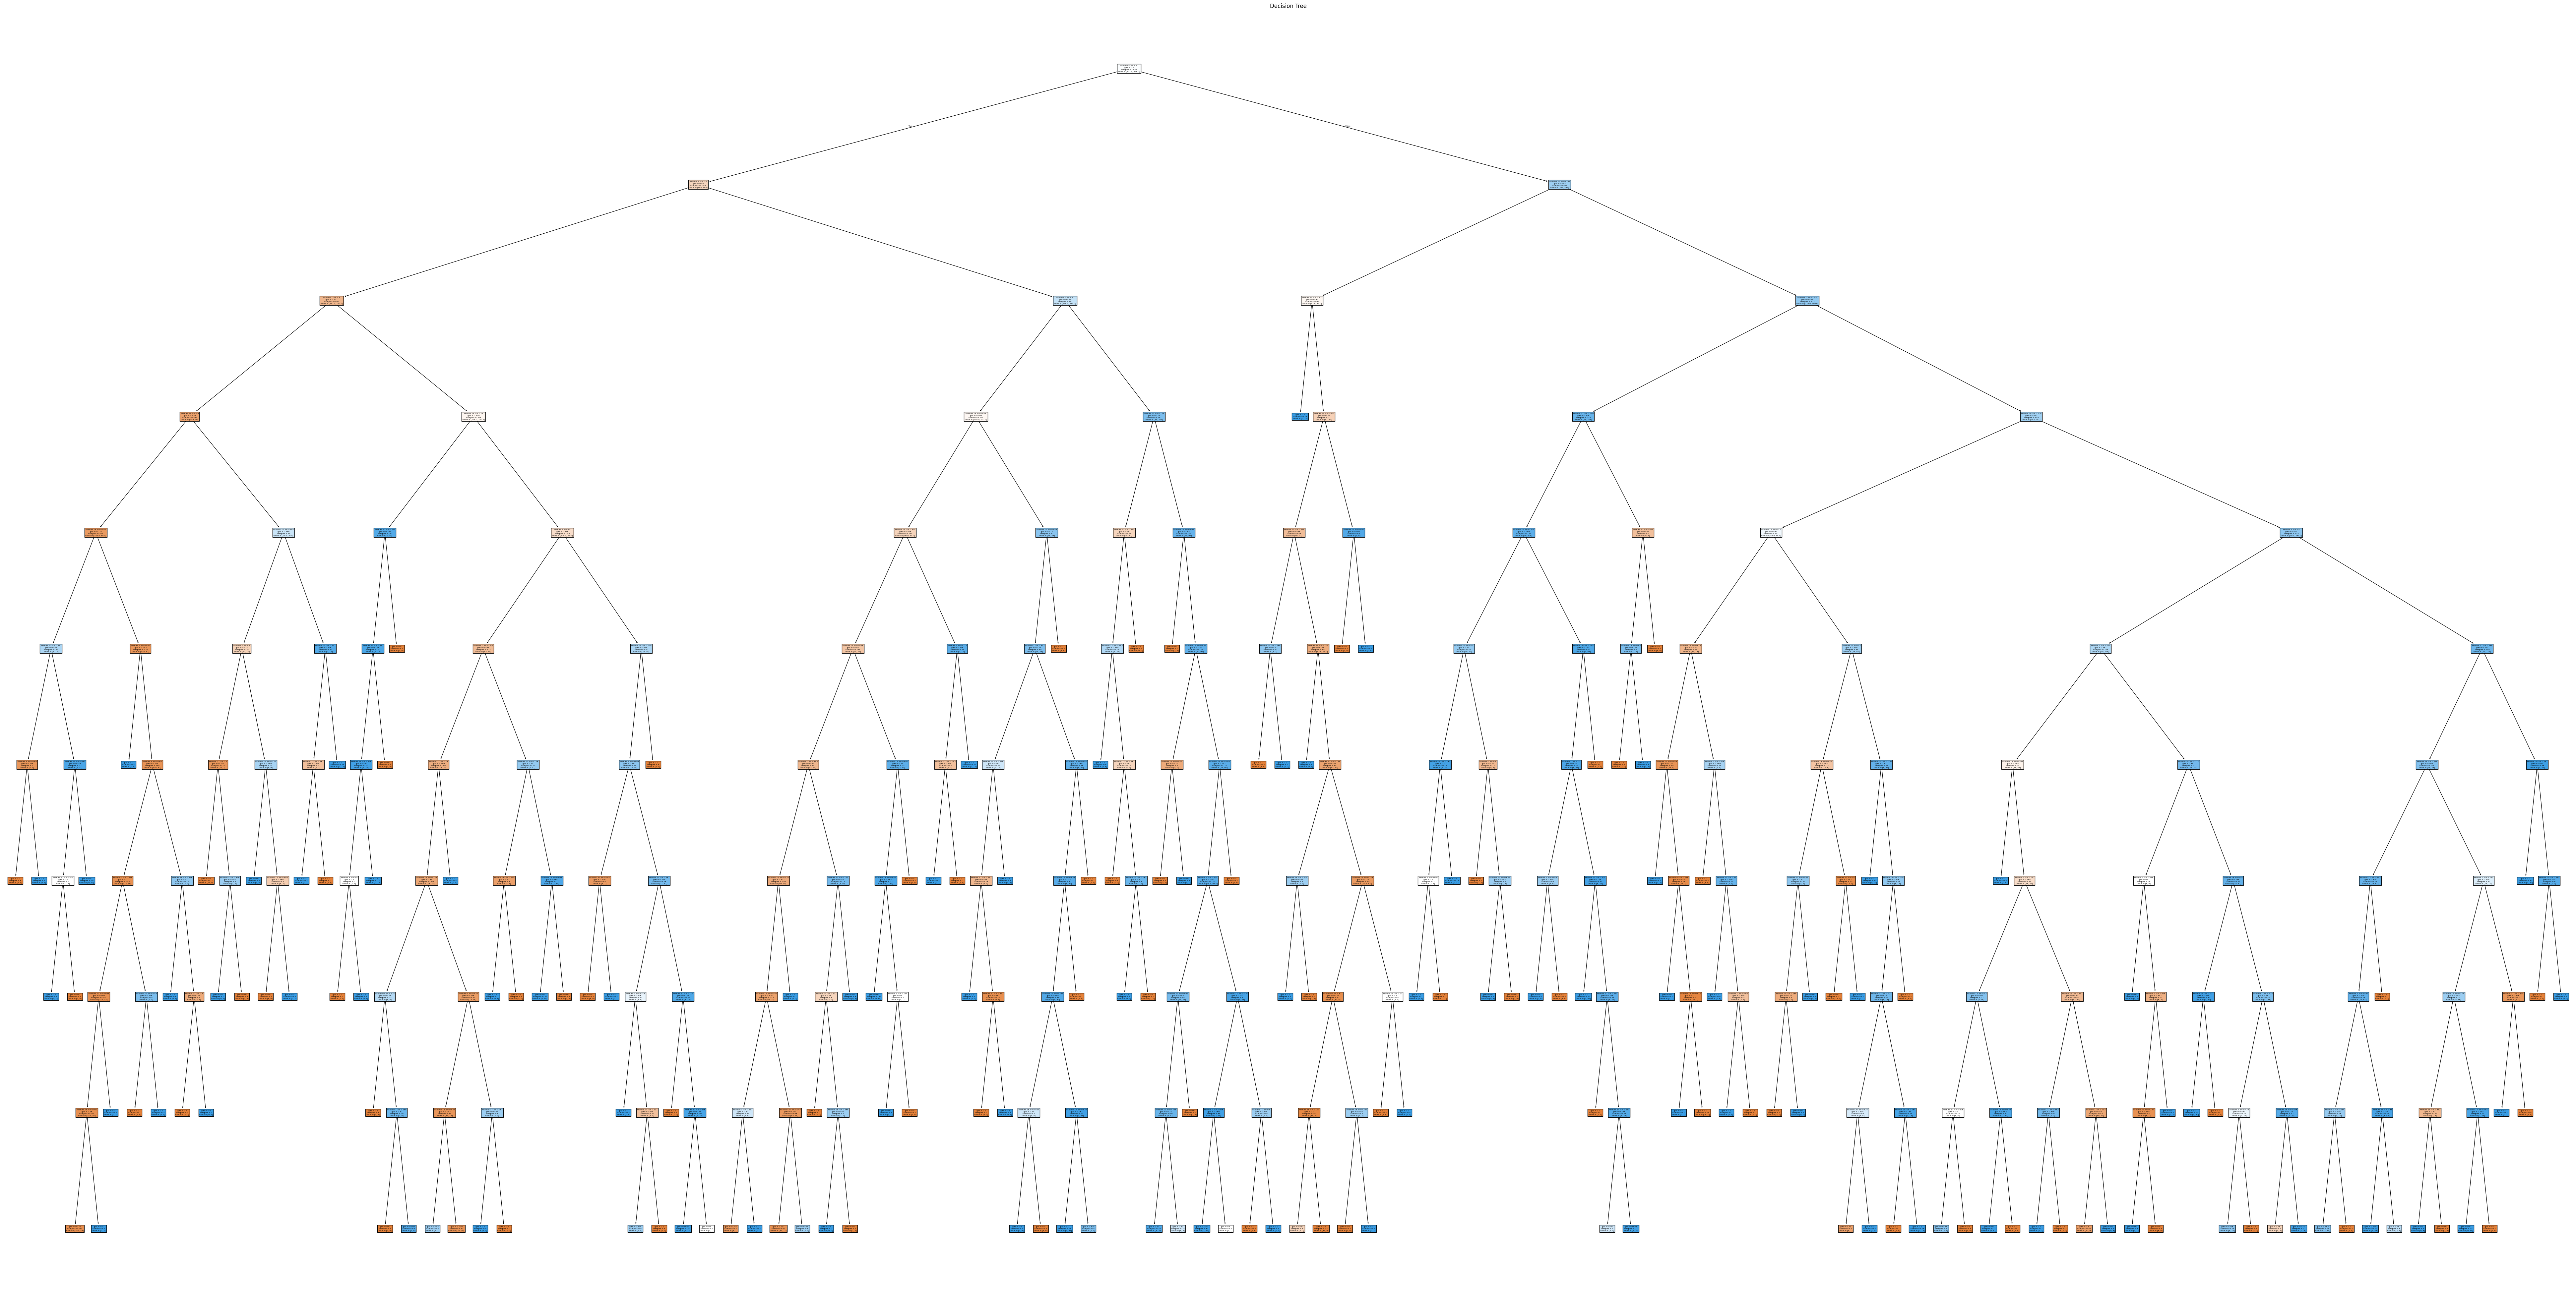

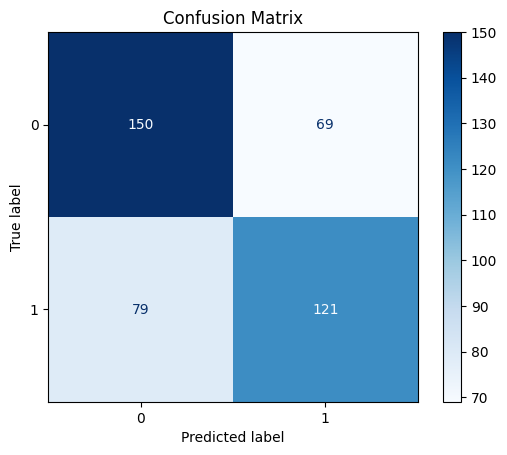

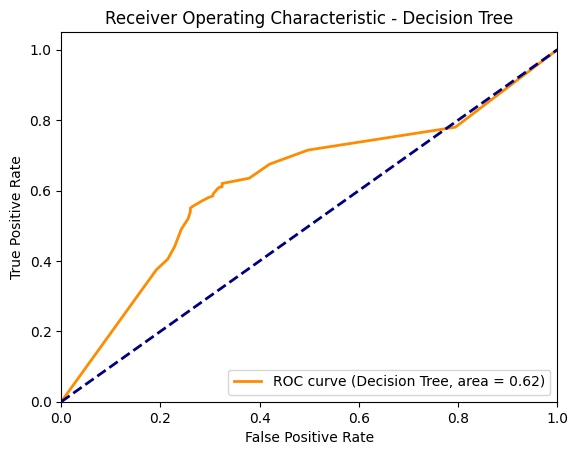

AUC: 0.6233561643835617


In [105]:
param_grid = {                                  # ابتدا پارامتر های ورودی را به صورت دستی وارد می کنیم
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}


dt_clf = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)  
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')


best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



plt.figure(figsize=(100,50))
plot_tree(best_clf, filled=True, feature_names=[f'Feature {i+1}' for i in range(X_train_selected.shape[1])])
plt.title("Decision Tree")
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



y_prob_tree = best_clf.predict_proba(X_test_selected)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'ROC curve (Decision Tree, area = {roc_auc_tree:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc_tree}')

## KNN classifier

Best k found: 1
Accuracy: 0.7119047619047619
Confusion Matrix:
[[181  28]
 [ 93 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       209
           1       0.81      0.56      0.66       211

    accuracy                           0.71       420
   macro avg       0.73      0.71      0.71       420
weighted avg       0.73      0.71      0.71       420



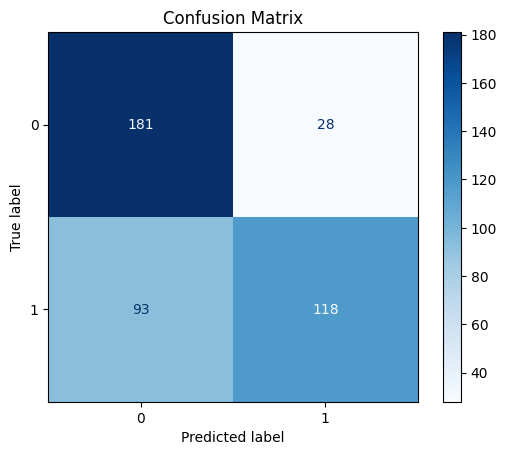

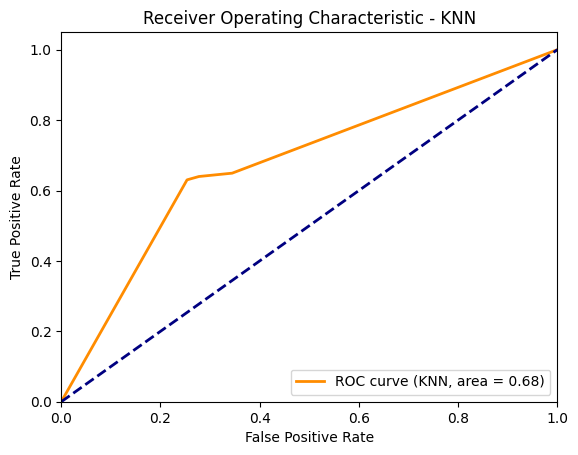

AUC: 0.6788475929159392


In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k found: {best_k}')


best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_selected, y_train)


y_pred = best_knn.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


y_prob_knn = best_clf.predict_proba(X_test_selected)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)


plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (KNN, area = {roc_auc_knn:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc_knn}')

# Strong classifiers

## SVM

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters found: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.8119047619047619
Confusion Matrix:
[[167  42]
 [ 37 174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       209
           1       0.81      0.82      0.81       211

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



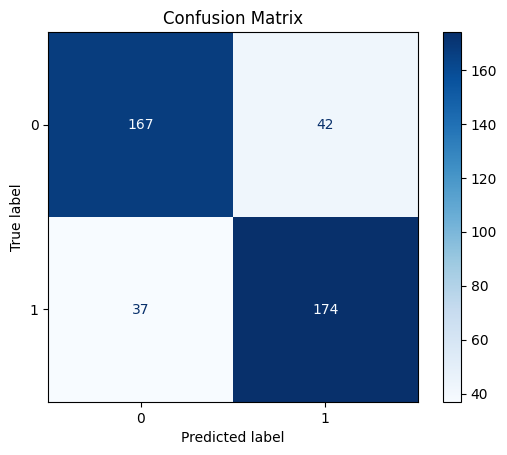

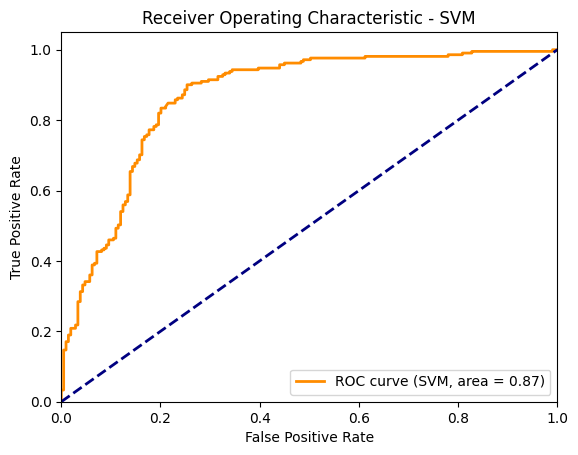

AUC: 0.8662327943944307


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_clf = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)


best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')


best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


y_prob_svm = best_clf.predict_proba(X_test_selected)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)


plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (SVM, area = {roc_auc_svm:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc_svm}')

## Random forest

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best parameters found: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8095238095238095
Confusion Matrix:
[[159  50]
 [ 30 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       209
           1       0.78      0.86      0.82       211

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



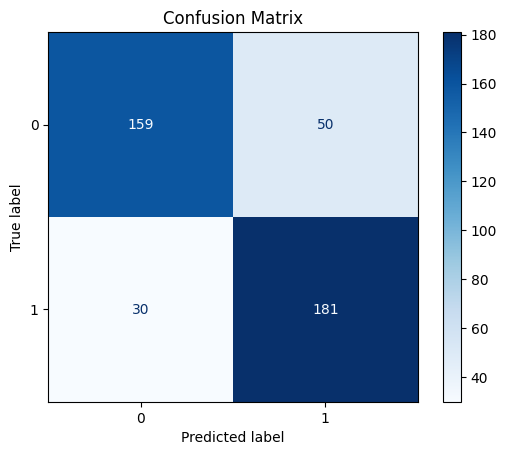

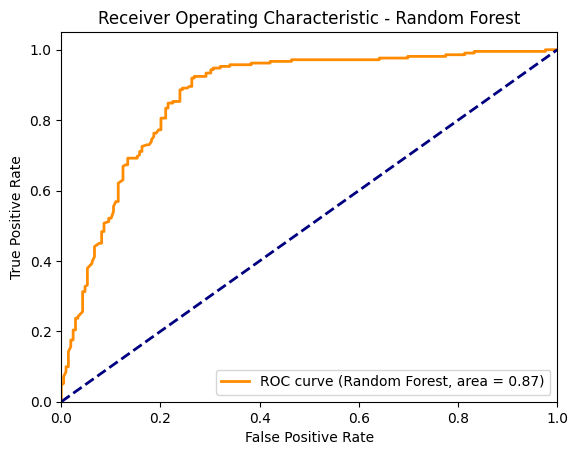

AUC: 0.8723667203337943


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)


best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')


best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


y_prob_rf = best_clf.predict_proba(X_test_selected)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)


plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (Random Forest, area = {roc_auc_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc_rf}')

# Ensemble classifiers:

### Bagging

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best parameters found: {'estimator__max_depth': 20, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.780952380952381
Confusion Matrix:
[[159  50]
 [ 42 169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       209
           1       0.77      0.80      0.79       211

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



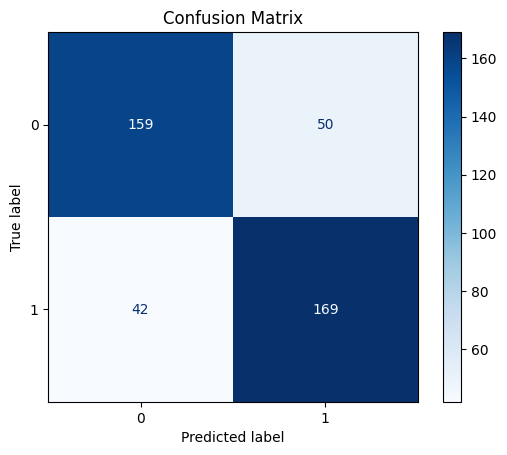

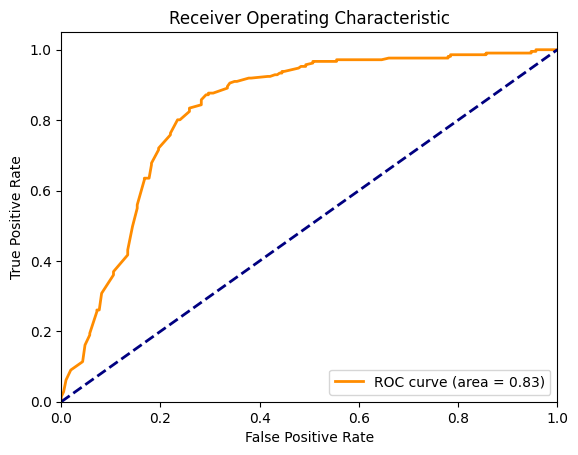

AUC: 0.8263112542234519


In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


y_prob_bag = best_clf.predict_proba(X_test_selected)[:, 1]
fpr_bag , tpr_bag , _ = roc_curve(y_test, y_prob_bag)
roc_auc_bag = roc_auc_score(y_test, y_prob_bag)


plt.figure()
plt.plot(fpr_bag , tpr_bag , color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_bag:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc_bag}')

## AdaBoost Classifier


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best parameters found: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy: 0.680952380952381
Confusion Matrix:
[[148  61]
 [ 73 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       209
           1       0.69      0.65      0.67       211

    accuracy                           0.68       420
   macro avg       0.68      0.68      0.68       420
weighted avg       0.68      0.68      0.68       420



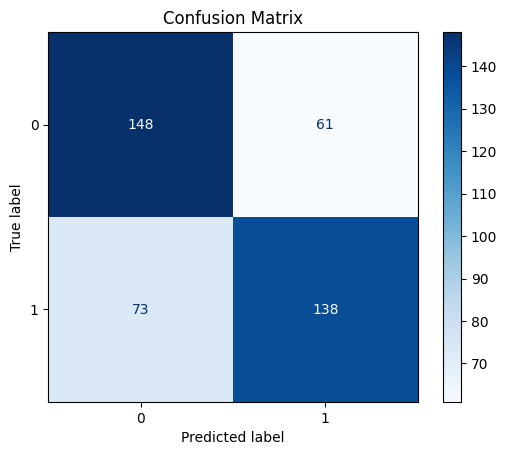

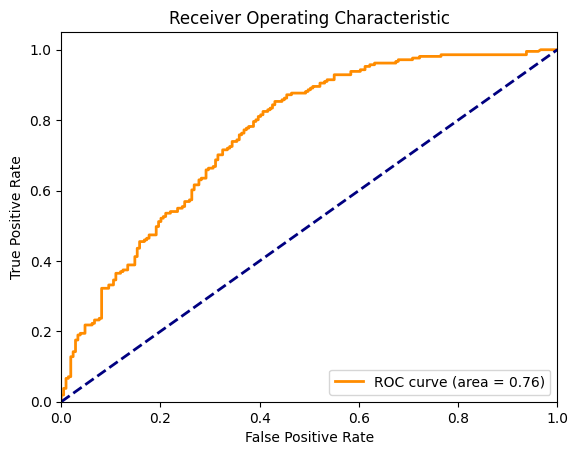

AUC: 0.7623415496950043


In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5]
}


ada_clf = AdaBoostClassifier(random_state=42 , algorithm="SAMME")
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')


best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

y_prob_add = best_clf.predict_proba(X_test_selected)[:, 1]
fpr_add , tpr_add , _ = roc_curve(y_test, y_prob_add)
roc_auc_add = roc_auc_score(y_test, y_prob_add)


plt.figure()
plt.plot(fpr_add , tpr_add , color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_add:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc_add}')

## Gradient Boosting Classifier

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.7952380952380952
Confusion Matrix:
[[170  39]
 [ 47 164]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       209
           1       0.81      0.78      0.79       211

    accuracy                           0.80       420
   macro avg       0.80      0.80      0.80       420
weighted avg       0.80      0.80      0.80       420



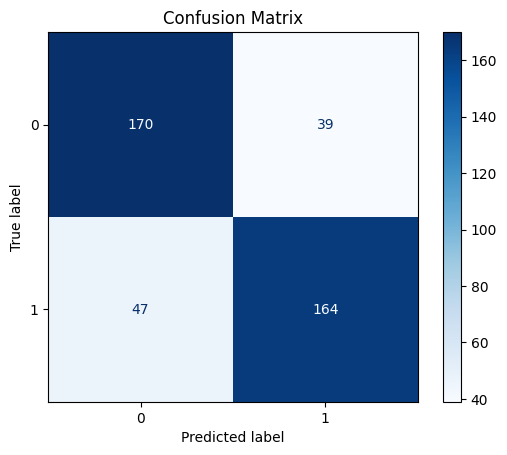

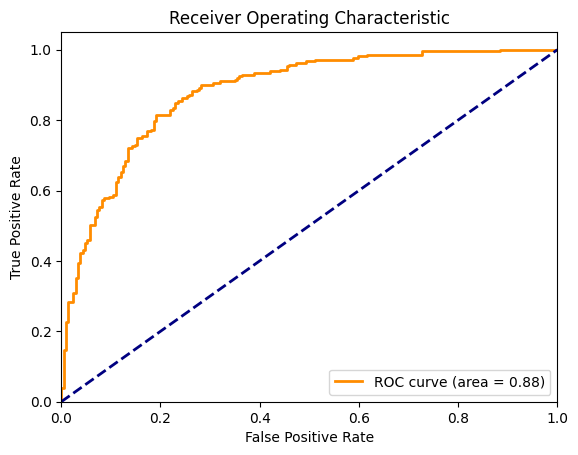

AUC: 0.8802693938638064


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5]
}

gb_clf = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

y_prob_gb = best_clf.predict_proba(X_test_selected)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc_gb}')

## XGboost

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


c:\Users\Mehryar\tens\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Mehryar\tens\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:48:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8071428571428572
Confusion Matrix:
[[169  40]
 [ 41 170]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       209
           1       0.81      0.81      0.81       211

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



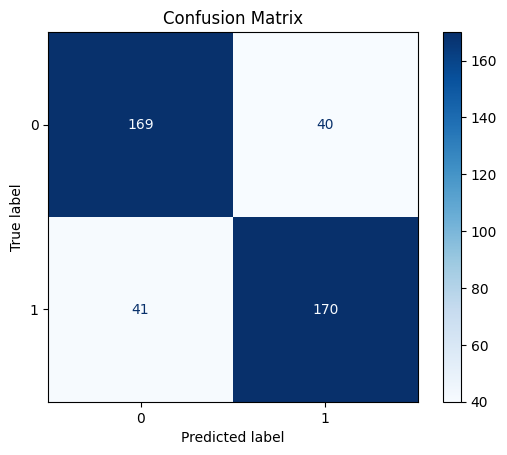

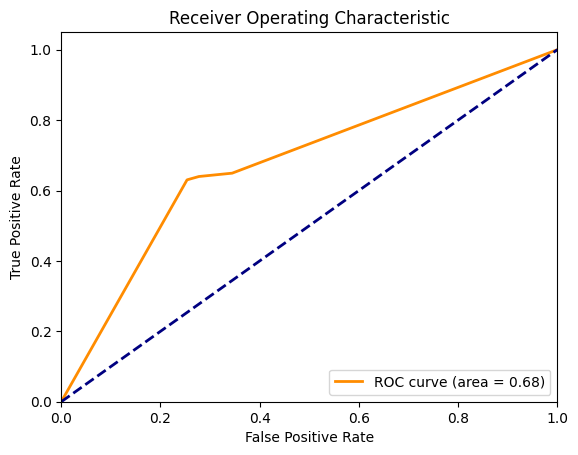

AUC: 0.6788475929159392


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=3)

grid_search.fit(X_train_selected, y_train)
best_params = grid_search.best_params_

print(f'Best parameters found: {best_params}')

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_selected)

accuracy_xgb = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

y_prob_xg = best_clf.predict_proba(X_test_selected)[:, 1]
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_prob)
roc_auc_xg = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr_xg , tpr_xg , color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xg:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc_xg}')

# Neural Network

In [ ]:
model = Sequential()
model.add(Dense(22, activation='relu', input_shape=(X_train_selected.shape[1],)))
model.add(Dense(44, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(len(set(y_train)), activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train_selected, y_train, 
                    epochs=50, 
                    validation_data=(X_test_selected, y_test))

loss, accuracy = model.evaluate(X_test_selected, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(f"Training Accuracy: {train_accuracy[-1]*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy[-1]*100:.2f}%")






Epoch 1/50


c:\Users\Mehryar\tens\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4881 - loss: 0.7758 - val_accuracy: 0.5048 - val_loss: 0.7228
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4944 - loss: 0.7203 - val_accuracy: 0.5024 - val_loss: 0.6989
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5237 - loss: 0.6848 - val_accuracy: 0.5214 - val_loss: 0.6885
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 0.6905 - val_accuracy: 0.5381 - val_loss: 0.6816
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5361 - loss: 0.6802 - val_accuracy: 0.5690 - val_loss: 0.6774
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5680 - loss: 0.6765 - val_accuracy: 0.6262 - val_loss: 0.6738
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6114 - loss: 0.6709 - val_accuracy: 0.6333 - val_loss: 0.6701
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6320 - loss: 0.6702 - val_accuracy: 0.6357 - val_loss: 0.6665
Epo

In [107]:
def build_model(hp):
    model2 = Sequential()
    model2.add(Dense(units=hp.Int('units_input', min_value=5, max_value=120, step=5),
                     activation='relu', input_shape=(22,)))

    n_layers = hp.Int('n_layers', 1, 5)
    for i in range(n_layers):
        model2.add(Dense(units=hp.Int(f'units_layer_{i+1}', 2, 90, step=2),
                         activation='relu'))

    model2.add(Dense(1, activation='sigmoid'))
    
    model2.compile(optimizer=tf.keras.optimizers.Adam(
                   learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return model2

tuner_dir = './my_dir/intro_to_kt_binary'
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)




tuner = Hyperband(
    build_model,
    objective=Objective('val_accuracy', direction="max"),
    max_epochs=100,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt_binary'
)




tuner.search_space_summary()
tuner.search(X_train_selected, y_train, epochs=20, validation_data=(X_test_selected, y_test), 
             callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=10)])



best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units_input')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
The optimal number of hidden layers is {best_hps.get('n_layers')}.
""")


for i in range(best_hps.get('n_layers')):
    print(f"Layer {i+1} optimal units: {best_hps.get(f'units_layer_{i+1}')}")





    

Trial 254 Complete [00h 00m 16s]
val_accuracy: 0.7255370020866394

Best val_accuracy So Far: 0.7470167279243469
Total elapsed time: 00h 25m 39s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 110.
The optimal learning rate for the optimizer is 0.0012954263738221747.
The optimal number of hidden layers is 4.

Layer 1 optimal units: 66
Layer 2 optimal units: 42
Layer 3 optimal units: 68
Layer 4 optimal units: 60


In [118]:
model2 = tuner.hypermodel.build(best_hps)
history = model2.fit(X_train_selected, y_train, epochs=500, validation_data=(X_test_selected, y_test), callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=12)])

loss, accuracy = model2.evaluate(X_test_selected, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(f"Training Accuracy: {train_accuracy[-1]*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy[-1]*100:.2f}%")

Epoch 1/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5843 - loss: 0.6650 - val_accuracy: 0.6730 - val_loss: 0.6309
Epoch 2/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6944 - loss: 0.5919 - val_accuracy: 0.6563 - val_loss: 0.6229
Epoch 3/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7066 - loss: 0.5732 - val_accuracy: 0.6874 - val_loss: 0.6131
Epoch 4/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.5650 - val_accuracy: 0.6921 - val_loss: 0.6118
Epoch 5/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7151 - loss: 0.5627 - val_accuracy: 0.6778 - val_loss: 0.6129
Epoch 6/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7458 - loss: 0.5199 - val_accuracy: 0.6635 - val_loss: 0.6041
Epoch 7/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7525 - loss: 0.5102 - val_accuracy: 0.6850 - val_loss: 0.6062
Epoch 8/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7972 - loss: 0.4592 - val_accuracy: 0.6420 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 69.93%
Precision: 0.68
Recall: 0.70
F1 Score: 0.69
Confusion Matrix:
[[152  67]
 [ 59 141]]


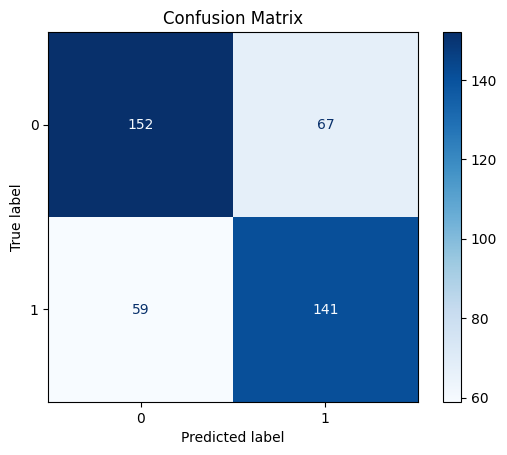

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


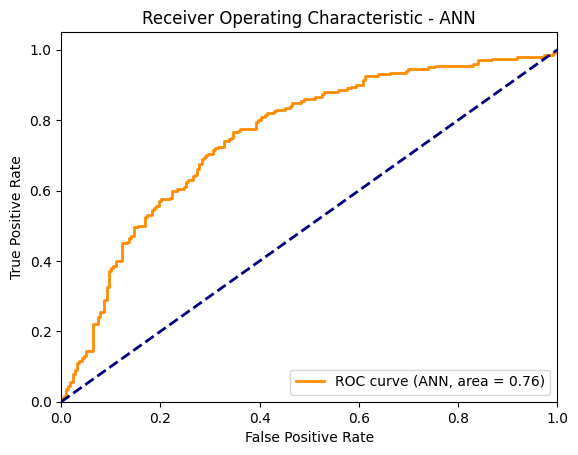

AUC: 0.7551826484018265


In [119]:
y_pred = model2.predict(X_test_selected)
y_pred_binary = (y_pred > 0.5).astype(int) 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_ann = accuracy_score(y_test, y_pred_binary)

precision_ann = precision_score(y_test, y_pred_binary)

recall_ann = recall_score(y_test, y_pred_binary)

f1 = f1_score(y_test, y_pred_binary)


print(f"Accuracy: {accuracy_ann*100:.2f}%")
print(f"Precision: {precision_ann:.2f}")
print(f"Recall: {recall_ann:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

y_prob_ann = model2.predict(X_test_selected)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)
roc_auc_ann = roc_auc_score(y_test, y_prob_ann)
plt.figure()
plt.plot(fpr_ann, tpr_ann, color='darkorange', lw=2, label=f'ROC curve (ANN, area = {roc_auc_ann:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ANN')
plt.legend(loc="lower right")
plt.show()
print(f'AUC: {roc_auc_ann}')


In [129]:
import plotly.graph_objects as go
import pandas as pd

metrics = {
    "Model": ["Decision Tree", 'k-NN','SVM','Random forest','Bagging','Gradiant Boost','Ada Boost','XG boost',"ANN"],
    "Accuracy": [0.64   , 0.71  , 0.81  ,0.81   ,0.78  ,0.68  ,0.80  ,0.81   ,0.7],
    "Precision": [0.64  , 0.81  , 0.81  ,0.78   ,0.77  ,0.69  ,0.81  ,0.81  ,0.68],
    "Recall": [   0.60  , 0.56  , 0.82  ,0.80   ,0.8  ,0.65  ,0.78  ,0.81   ,0.7],
    "F1 Score": [0.62   , 0.66  , 0.81  ,0.82   ,0.79  ,0.67  ,0.79  ,0.81   ,0.69]
}


df_metrics = pd.DataFrame(metrics)


fig = go.Figure()


metrics_list = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ['blue', 'green', 'red', 'purple']  

for metric, color in zip(metrics_list, colors):
    fig.add_trace(go.Bar(
        x=df_metrics['Model'],
        y=df_metrics[metric],
        name=metric,
        marker_color=color
    ))


fig.update_layout(
    title="Model Performance Comparison",
    xaxis_title="Model",
    yaxis_title="Score",
    barmode='group',  
    legend_title="Metric",
    hovermode="x unified",
    width=1200,  
    height=600, 
)

fig.show()
